In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.optimizers

import cv2
import os
import shutil

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
        
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import accuracy_score, classification_report


In [147]:
DEBUG = False
if DEBUG:
    image_shape = (650, 525)
    max_samples = 10
    num_epochs = 10
    
else:
    image_shape = (650, 525)
    max_samples = None
    num_epochs = 100

# *Training data preparation*****

In [169]:
def extract_info_from_hea(label_mapping):
    data = []

    # Iterate over all files in the given folder
    for filename in pysio_paths:
        if filename.endswith(".hea"):
            file_path = filename #os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                lines = file.readlines()
                image_path = ""
                labels = ""
                
                # Iterate over each line in the .hea file
                for line in lines:
                    if 'Labels' in line:
                        labels = line.split(":")[1].strip()
                    if 'png' in line:
                        image_path = line.split(":")[1].strip()
                
                # Create a dictionary to hold the image path and label information
                label_info = {label: 0 for label in label_mapping}
        
                if labels:
                    for label in labels.split(","):
                        if label.strip() in label_mapping:
                            label_info[label.strip()] = 1
                
                label_info["Image_Name"] = image_path
                
                #get the head and tail path 
                head, tail = os.path.split(filename)
                new_path = os.path.join(head, image_path)
                label_info["Image_Path"] = new_path
                data.append(label_info)
    
    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)
    return df

In [172]:
pysio_paths = []
for dirname, _, filenames in os.walk('/kaggle/input/physionet-flash-data/data/records500'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        if os.path.isfile(os.path.join(dirname, filename)):
            pysio_paths.append(os.path.join(dirname, filename))

In [173]:
# Define the label mapping
label_mapping = {"NORM", "Acute MI", "Old MI", "STTC", "CD", "HYP", "PAC", "PVC", "AFIB/AFL", "TACHY", "BRADY"}

# Extract information from the .hea files and create the DataFrame
df = extract_info_from_hea(label_mapping)

In [174]:
df.head()

,TACHY,PVC,HYP,PAC,STTC,CD,BRADY,Acute MI,Old MI,NORM,AFIB/AFL,Image_Name,Image_Path
0,0,0,0,0,1,0,0,0,1,0,0,21240_hr-0.png,/kaggle/input/physionet-flash-data/data/record...
1,0,0,0,0,1,0,0,0,1,0,0,21604_hr-0.png,/kaggle/input/physionet-flash-data/data/record...
2,0,0,0,0,0,0,0,0,0,1,0,21080_hr-0.png,/kaggle/input/physionet-flash-data/data/record...
3,0,0,0,0,0,0,0,0,0,1,0,21694_hr-0.png,/kaggle/input/physionet-flash-data/data/record...
4,0,1,1,0,1,0,0,0,0,0,0,21504_hr-0.png,/kaggle/input/physionet-flash-data/data/record...


In [175]:
csv_path ='multilabel_classification.csv'
df.to_csv(csv_path, index=False)

2440027921 - Audrey Levina
UAS Deep Learning LBB2

# Check health of Physionet dataset

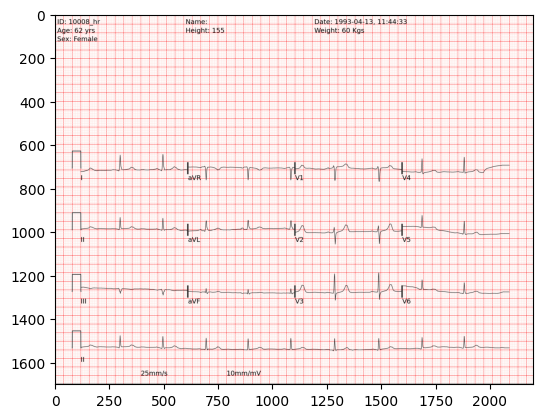

In [177]:
plt.imshow(plt.imread('/kaggle/input/physionet-flash-data/data/records500/10000/10008_hr-0.png'))

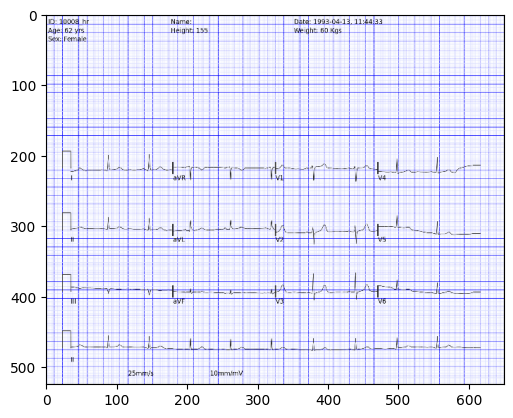

In [178]:
image = cv2.imread(f"/kaggle/input/physionet-flash-data/data/records500/10000/10008_hr-0.png")
image = cv2.resize(image, (650, 525))
plt.imshow(image)

In [179]:
data = pd.read_csv("/kaggle/working/multilabel_classification.csv")
data.head(5)

,TACHY,PVC,HYP,PAC,STTC,CD,BRADY,Acute MI,Old MI,NORM,AFIB/AFL,Image_Name,Image_Path
0,0,0,0,0,1,0,0,0,1,0,0,21240_hr-0.png,/kaggle/input/physionet-flash-data/data/record...
1,0,0,0,0,1,0,0,0,1,0,0,21604_hr-0.png,/kaggle/input/physionet-flash-data/data/record...
2,0,0,0,0,0,0,0,0,0,1,0,21080_hr-0.png,/kaggle/input/physionet-flash-data/data/record...
3,0,0,0,0,0,0,0,0,0,1,0,21694_hr-0.png,/kaggle/input/physionet-flash-data/data/record...
4,0,1,1,0,1,0,0,0,0,0,0,21504_hr-0.png,/kaggle/input/physionet-flash-data/data/record...


In [180]:
data.shape # therefore 11 dense outputs

(21799, 13)

Karena memiliki masalah pada data mulai dari index ke 7823, maka data akan dicut hingga index 7823

means 

Because there is a problem with the data starting from index 7823, the data will be cut down to index 7823



In [181]:
data = data[:max_samples]
# data = data[:10]
len(data)

10

In [183]:
image_list = [] 
for i in range(len(data)):
    image = cv2.imread(f"{(data['Image_Path'])[i]}")
    image = cv2.resize(image, image_shape)
    image_list.append(image)
  

In [184]:
image_list = np.array(image_list) 

In [185]:
image_list.shape

(10, 525, 650, 3)

In [188]:
data_minus_image_names = data.drop(axis=1,columns=['Image_Name'])




In [189]:

data_minus_image_names = data_minus_image_names.drop(axis=1,columns=['Image_Path'])

In [190]:
data_minus_image_names.head()

,TACHY,PVC,HYP,PAC,STTC,CD,BRADY,Acute MI,Old MI,NORM,AFIB/AFL
0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,0,0


In [191]:
column_names = data_minus_image_names.columns
print('Columns : ',column_names.to_list())
column_names = column_names.to_list()

Columns :  ['TACHY', 'PVC', 'HYP', 'PAC', 'STTC', 'CD', 'BRADY', 'Acute MI', 'Old MI', 'NORM', 'AFIB/AFL']


In [192]:
#Categorical Data
#y = data[['motorcycle', 'truck', 'boat', 'bus', 'cycle', 'sitar', 'ektara', 'flutes', 'tabla', 'harmonium']].values
y = data[column_names].values
y

array([[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [193]:
x_train, x_testval, y_train, y_testval = train_test_split(image_list, y, test_size=0.2, random_state=42) #80% Train, 10% Validation, 10% Test
x_val, x_test, y_val, y_test = train_test_split(x_testval, y_testval, test_size=0.5, random_state=42)

# 80:10:10 split

Model

In [194]:
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_shape[1], image_shape[0], 3))

In [195]:
image_shape[0], image_shape[1]

(650, 525)

In [196]:
x = keras.layers.GlobalAveragePooling2D()(model.output)
x = keras.layers.Dense(32, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
output = keras.layers.Dense(11, activation='sigmoid')(x)

In [197]:
model = keras.models.Model(inputs=model.input, outputs=output)

In [198]:
#model.summary()

In [199]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
import tensorflow as tf

#model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) #metric = f1_score ?/? micro, macro or weighted
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.F1Score(average='macro', threshold=None, name='f1_score', dtype=None)]) #metric = f1_score

In [200]:
type(x_train)

numpy.ndarray

In [201]:
x_train.shape

(8, 525, 650, 3)

In [124]:
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63s/step - f1_score: 0.0364 - loss: 0.6881

W0000 00:00:1720025187.859747     194 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 69s 69s/step - f1_score: 0.0364 - loss: 0.6881 - val_f1_score: 0.0000e+00 - val_loss: 2.1537
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - f1_score: 0.1742 - loss: 0.6248 - val_f1_score: 0.0000e+00 - val_loss: 1.5664
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - f1_score: 0.2242 - loss: 0.5759 - val_f1_score: 0.0000e+00 - val_loss: 1.3068
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - f1_score: 0.2545 - loss: 0.5413 - val_f1_score: 0.0000e+00 - val_loss: 1.1605
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - f1_score: 0.2242 - loss: 0.5069 - val_f1_score: 0.0000e+00 - val_loss: 1.0526
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - f1_score: 0.3152 - loss: 0.4840 - val_f1_score: 0.0000e+00 - val_loss: 0.9727
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - f1_score: 0.2242 - loss: 0.4667 - val_f1_score: 0.0000e+00 - val_loss: 0.9040
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - f1_score: 0.1961 - loss: 0.4408 - val_f1_score: 0.

In [125]:
# accuracy_history = history.history['accuracy']
# val_accuracy_history = history.history['val_accuracy']

# plt.figure(figsize=(12, 6))
# plt.plot(accuracy_history, label='Accuracy')
# plt.plot(val_accuracy_history, label='Val_Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training Accuracy')
# plt.legend()

In [126]:
# history.history

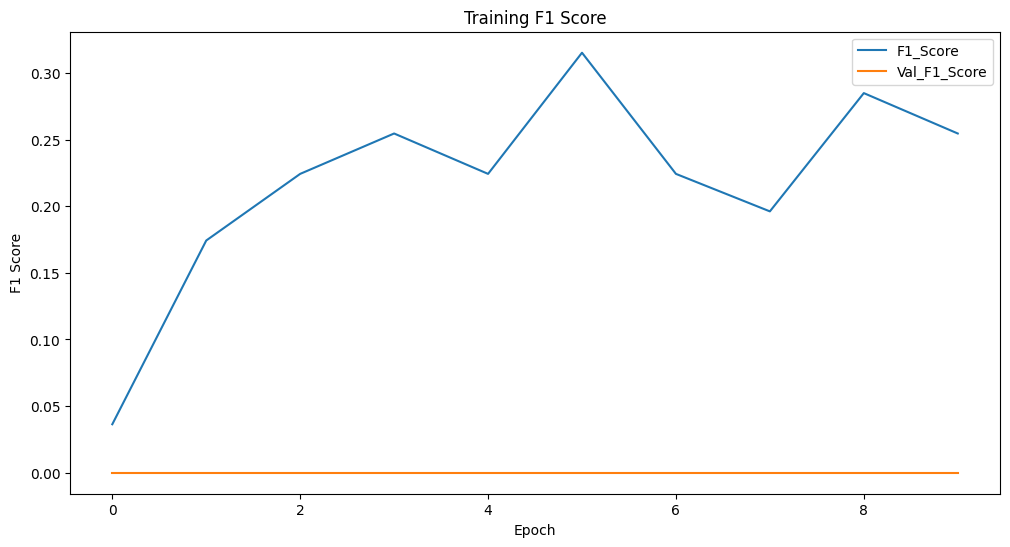

In [127]:
# accuracy_history = history.history['accuracy']
# val_accuracy_history = history.history['val_accuracy']

# plt.figure(figsize=(12, 6))
# plt.plot(accuracy_history, label='Accuracy')
# plt.plot(val_accuracy_history, label='Val_Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training Accuracy')
# plt.legend()

f1_score_history = history.history['f1_score']
val_f1_score_history = history.history['val_f1_score']

plt.figure(figsize=(12, 6))
plt.plot(f1_score_history, label='F1_Score')
plt.plot(val_f1_score_history, label='Val_F1_Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Training F1 Score')
plt.legend()

In [128]:
preds = model.predict(x_test)
y_pred = (preds >= 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [129]:
y_pred.shape

(1, 11)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, y_pred, average='micro')

0.4

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.0


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0

   micro avg       0.25      1.00      0.40         1
   macro avg       0.09      0.09      0.09         1
weighted avg       1.00      1.00      1.00         1
 samples avg       0.25      1.00      0.40         1



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save('multilabel-model.keras')

# inferencing the model

In [ ]:
img = cv2.imread('/kaggle/input/physionet-flash-data/data/records500/00000/00010_hr-0.png')
print(img.shape)
img = cv2.resize(img, image_shape) # NOTE2SELF note this is different from the training set
images = np.array([img])
output = model.predict(images)
#type(img)

(1700, 2200, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
output
#'motorcycle', 'truck', 'boat', 'bus', 'cycle', 'sitar', 'ektara', 'flutes', 'tabla', 'harmonium'

array([[0.0466871 , 0.41202185, 0.39935058, 0.5820974 , 0.8898958 ,
        0.8032546 , 0.4169096 , 0.05607143, 0.02033843, 0.13061549,
        0.72392446]], dtype=float32)

In [ ]:
class_array = (output >= 0.5).astype(int)
print(class_array)

[[0 0 0 1 1 1 0 0 0 0 1]]


In [ ]:
classes = column_names

In [ ]:
# Find the indices where the value is 1
indices = np.where(class_array[0] == 1)[0]

# Map indices to class labels
mapped_classes = [classes[i] for i in indices]

print(mapped_classes)

['PVC', 'CD', 'PAC', 'NORM']


In [ ]:
print(indices)

[ 3  4  5 10]


In [ ]:
sum(output[0])

4.481166757643223

In [ ]:
# example = plt.imshow(plt.imread('/kaggle/input/physionet-playground/new-data/images/01002_hr-0.png'))

In [ ]:
#'motorcycle', 'truck', 'boat', 'bus', 'cycle', 'sitar', 'ektara', 'flutes', 'tabla', 'harmonium'
#help(model)

# Below is the complete inference code

In [ ]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('/kaggle/working/multilabel-model.keras')

# # Display the model architecture
# model.summary()

#read image
img = cv2.imread('/kaggle/input/physionet-flash-data/data/records500/00000/00010_hr-0.png')
print('Original image shape',img.shape)
img = cv2.resize(img, image_shape)
print('Resized image shape',img.shape)

#preprosess image for inferencing
images = np.array([img])
#inference
output = model.predict(images)
#get all labels
class_array = (output >= 0.5).astype(int)
print(class_array)
classes = ['Acute MI', 'PAC', 'NORM', 'PVC', 'Old MI', 'STTC', 'TACHY', 'HYP', 'CD', 'BRADY', 'AFIB/AFL']
# Find the indices where the value is 1
indices = np.where(class_array[0] == 1)[0]

# Map indices to class labels
mapped_classes = [classes[i] for i in indices]

print(mapped_classes)

Original image shape (1700, 2200, 3)
Resized image shape (525, 650, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[[0 0 0 1 1 1 0 0 0 0 1]]
['PVC', 'Old MI', 'STTC', 'AFIB/AFL']
